In [ ]:
# Usual Suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
# SM stuff
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Supervised Learning: Classification
### Method: Logistic Regression
Logistic Regression is one of the most commonly used for ML methods for predictive analytics and modeling, where the dependent variable is finite or categorical, e.g.
 * either A or B (binary regression) or 
 * a range of finite options A, B, C or D (multinomial regression) <br>

<b> Application Examples </b>
* (Medicine) To predict the likelihood of disease or illness for a given population, which means that preventative care can be put in place. 
* (Businesses) To uncover patterns that lead to higher employee retention or create more profitable products by analyzing buyer behavior. 
* (Banking) Loan default prediction. Credit risk assessment.
* (Sports Betting) Sport result prediction, e.g. team-A wins, team-B wins, draw

### Logistic Function
In its basic form, logistic regression uses a logistic function to model a binary dependent variable. <br>
Consider a model with one predictor, $X$ and one binary (Bernoulli) response variable $Y$, which we denote $p=P(Y=1)$. We assume a linear relationship between the predictor variable and the log-odds (also called logit) of the event that $Y=1$. This linear relationship can be written in the following mathematical form (where $\ell$ is the log-odds, $\beta _{i}$ are parameters of the model):

$$ \ell = \log \bigg( \dfrac{{p}} {1 - p} \bigg) = \beta_{0} + \beta_{1}X  $$

<br>
We can recover the "odds" by exponentiating the log-odds 
$$ p = \dfrac{e^{\beta_{0} + \beta_{1}X}} {1 + e^{\beta_{0} + \beta_{1}X} } $$


The above formula shows that once $\beta _{i}$ are fixed, we can easily compute either the log-odds that $Y=1$ for a given observation, or the probability that $Y=1$ for a given observation. <br>
The main use-case of a logistic model is to be given an observation $X$ and estimate the probability $p$ that $Y=1$.


<br>
Note that the above can be changed for multiple logisitic regression for the linear compination of independent variables $\beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + \dotso + \beta_{k}X_{k } $ <br>



 

In [ ]:
# let's look at these \ell and p functions
p_x = np.arange(0.0001,0.999999999,0.0001)
r_y = [np.log(i/(1-i)) for i in p_x]
plt.scatter(p_x,r_y)
plt.xlabel('p');
plt.ylabel('$\ell$');

You can see that this function goes to to -inf and inf as we get close to 0 and 1, respectively. <br>
<br>
Visualizing the inverse logit:
$$ logit^{-1}(a) = \dfrac{e^{a} } {1 + e^{a}}  $$
where $a = \beta_{0} + \beta_{1}X$

In [ ]:
x = np.arange(-10,10,0.001)
y = [np.exp(i)/(1+np.exp(i)) for i in x]
plt.plot(x,y)
plt.xlabel('a')
plt.ylabel('p')

## A Simple Example
* Lets say we are an individual applying for a loan in an Icelandic bank and want to know the probability of our creditscore getting us a loan at the bank. 
* We have our individual credit scores and their categorical binary value.
* Data for each applicant:
  * x-axis: Icelandic credit score points ranging 100(bad credit score) to 400(excellent)
  * y-axis: Approved as 1 or 0

In [ ]:
# Read the data in
df = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/loans.csv")
df.tail()

In [ ]:
df.describe()

In [ ]:
print(df.accepted.value_counts())

In [ ]:
df.hist(layout=(3,2), figsize=(15,15))
plt.show()

In [ ]:
# Let's only use creditscore to predict accepted
df = df.loc[:,('accepted','creditscore')]
x = df.creditscore.values
y = df.accepted.values

plt.scatter(x,y)

The figure above is a little bit misleading and scary!!
Let's plot creditscore histograms for approved and non-approved separately.

In [ ]:
df.loc[df.accepted==1,'creditscore'].hist()
plt.show()
df.loc[df.accepted==0,'creditscore'].hist()
plt.show()

It loooks like credit score ~300 is the boundary for most approvals/denials.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train.reshape(-1,1), y_train)

In [ ]:
y_predict = logreg.predict(X_test.reshape(-1,1))

In [ ]:
logreg.score(X_test.reshape(-1,1) , y_test)

## Confusion Matrix
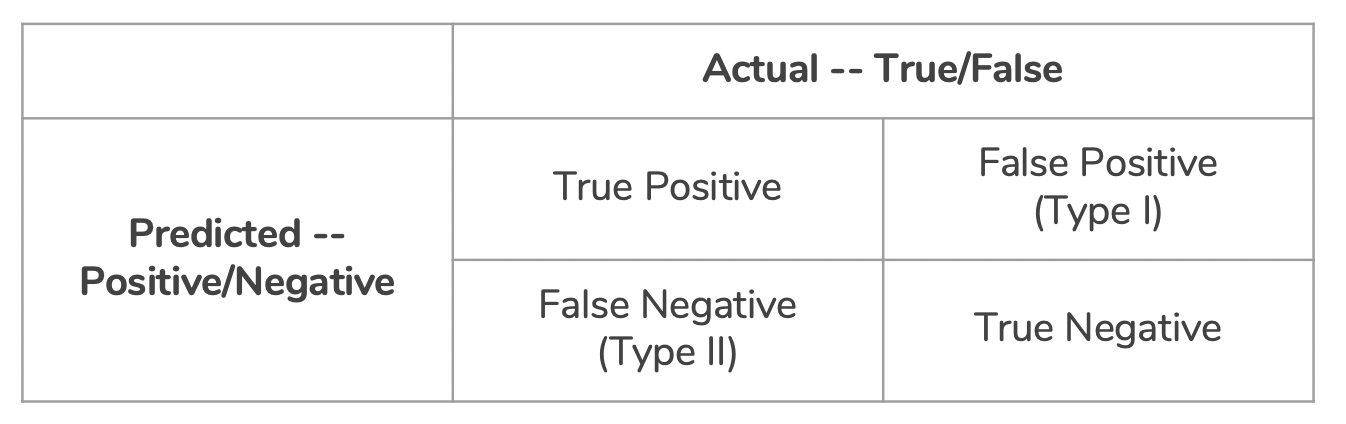

From our confusion matrix, we can calculate five different metrics measuring the validity of our model. <br>
1. Accuracy (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
2. Misclassification (all incorrect / all) = 1 - Accuracy 
3. Precision (true positives / predicted positives) = TP / (TP + FP)
4. Sensitivity aka Recall (true positives / all actual positives) = TP / (TP + FN)
5. Specificity (true negatives / all actual negatives) =TN / (TN + FP)

* Sensitivity and Specificity are extremely crucial for health DS. <br>
  * <b>Sensitivity</b>: how often a test correctly generates a positive result for people who have the condition that’s being tested for. 
  * <b>Specificity</b>: how often a test correctly generates a <b>negative</b> result for people who <b>doesn't</b> have the condition that’s being tested for. <br>
<br>

* <b>Recall</b> measures the ability of a model to find all the relevant cases within a data set. For example <br>

$$ \frac{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam}}{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam} \ + {\mathrm{Spam \ emails \ incorrectly \ labeled \ as \ not \ spam}}} $$ 

<br>

* <b>Precision</b> expresses the proportion of the data points our model says existed in the relevant class that were indeed relevant. <br>

$$ \frac{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam}}{\mathrm{Spam \ emails \ correctly \ labeled \ as \ spam} \ + {\mathrm{Normal \ emails \ incorrectly \ labeled \ spam}}} $$ 
<br>

### F1 Score
In some situations, we might know we want to maximize either recall or precision at the expense of the other metric. For example, in preliminary disease screening of patients for follow-up examinations, we would probably want a recall near 1.0—we want to find all patients who actually have the disease—and we can accept a low precision - we accidentally find some patients have the disease who actually don’t have it - if the cost of the follow-up examination isn’t high. However, in cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using the F1 score.


* The <b>F1 score</b> is the harmonic mean of precision and recall, taking both metrics into account in the following equation:

$$ F_1 = 2 \times \frac{\mathrm{precision}\times \mathrm{recall}}{\mathrm{precision}+\mathrm{recall}} $$

 ### ROC Curve
ROC = Receiver Operating Characteristic. <br>
* ROC is one of the most fundamenntal visualization techniques for showing the performance of a classification model.
* ROC shows how the recall vs. precision relationship changes as we vary the threshold for identifying a positive data point in our model.
* The threshold represents the value above which we consider a data point in the positive class. 

A typical ROC curve looks like this: 

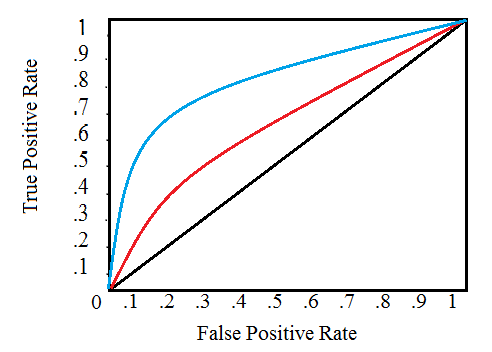

* We can quantify a model’s ROC curve by calculating the total Area Under the Curve (AUC), a metric that falls between zero and one with a higher number indicating better classification performance. 
* In the graph above, the AUC for the blue curve will be greater than that for the red curve, meaning the blue model is better at achieving a blend of precision and recall. 
* A random classifier (the black line) achieves an AUC of 0.5.

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

In [ ]:
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

In [ ]:
print(logreg.coef_, logreg.intercept_)

From our output we get a positive coefficient slope for the credit score. <br>

That means that the probability of getting a loan increases as we get a higher credit score.<br>

If we have P>|z| value of 0.000 which is higher then 0.001 and then that indipendent variable is significant.

Now we can put the coefficients into the estimated regression equation

In [ ]:
test_x = np.array([230])
logreg.predict(test_x.reshape(-1, 1))

In [ ]:
a = logreg.intercept_ + test_x*logreg.coef_
p = np.exp(a)/(1 + np.exp(a))
print(p)

Someone with a credit score of [230] has an estimated probabilty of 12.16 % to get a loan.

In [ ]:
test_x = np.array([370])
logreg.predict(test_x.reshape(-1, 1))

In [ ]:
a = logreg.intercept_ + test_x*logreg.coef_
p = np.exp(a)/(1 + np.exp(a))
print(p)

Someone with a credit score of 370 has an estimated probabilty of 92.72 % to get a loan.

In [ ]:
test_x = np.arange(100,400)
test_y = logreg.predict(test_x.reshape(-1, 1))

a = logreg.intercept_ + test_x*logreg.coef_
p = np.exp(a)/(1 + np.exp(a))
plt.scatter(test_x,test_y)
plt.plot(test_x,np.squeeze(p),'r')

## Multiple Logistic Regression:
* What is the probability for someone getting a loan with:
    * credit_score = 300.
    * loan_amount = 30000000
    * age = 80
    * marital = 0
    * health_insurance = 0

In [ ]:
dfm = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/loans.csv")

In [ ]:
dfm.head()

In [ ]:
dfm.describe()

In [ ]:
x = dfm.loc[:,['creditscore','amount','age','marital','health_ins']].values
y = dfm.loc[:,'accepted'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

This is extremely low!!! What's going on? <br>
Let's check the confusion matrix

In [ ]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

I think I know what's going on.. Watch this.

In [ ]:
df = dfm.copy()
df.amount = np.log10(df.amount)
x = df.loc[:,['creditscore','amount','age','marital','health_ins']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

In [ ]:
y_predict = logreg.predict(X_test)
cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

In [ ]:
test_info = np.array([300,np.log10(30000000),80,0,0])
logreg.predict(test_info.reshape((1,5)))

It looks like this person won't get the loan. <br>
What was the probability of him getting the loan?

In [ ]:
print(logreg.coef_, logreg.intercept_)

In [ ]:
a = logreg.coef_[0,0]*test_info[0]+logreg.coef_[0,1]*test_info[1]+logreg.coef_[0,2]*test_info[2]+logreg.coef_[0,3]*test_info[3]+logreg.coef_[0,4]*test_info[4]+logreg.intercept_
p = np.exp(a)/(1 + np.exp(a))
print(p)

In [ ]:
a = logreg.intercept_ 
for i in range(0,5):
  a = a+logreg.coef_[0,i]*test_info[i]
p = np.exp(a)/(1 + np.exp(a))
print(p)  

Ouch! 2.77% only. No way he can get a loan!

##  ScikitLearn Has So Many Other ML Algos

### k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)


df = dfm.copy()
df.amount = np.log10(df.amount)
x = df.loc[:,['creditscore','amount','age','marital','health_ins']].values
y = df.loc[:,'accepted'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

 ### SGD Classifier
 Regularized linear models with stochastic gradient descent (SGD) learning

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

### Artificial Neural Network (One Layer)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
number_of_classes = 1
number_of_features = 5
model = Sequential()
model.add(Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [ ]:
model.summary()

In [ ]:
y_predict = model.predict(X_test)
y_predict[y_predict>=0.5] = 1
y_predict[y_predict<0.5] = 0

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

### Artificial Neural Network (Three Layers)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(6, activation='sigmoid')(input_layer)
dense_layer_2 = Dense(6, activation='sigmoid')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

In [ ]:
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy')
print(model.summary())

In [ ]:
from tensorflow.keras.layers import Normalization
layer = Normalization(axis=-1)
layer.adapt(X_train)
X_train_n = layer(X_train)
X_test_n = layer(X_test)

In [ ]:
history = model.fit(X_train_n, y_train, epochs=50, verbose=0, validation_data=(X_test_n, y_test))

y_predict = model.predict(X_test_n)
y_predict[y_predict>=0.5] = 1
y_predict[y_predict<0.5] = 0

cm1 = confusion_matrix(y_test,y_predict)
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)